# Forward Propagation Process

**Layer-by-layer computation**

- Input to hidden layer 1
- Hidden layer 1 to hidden layer 2
- Final hidden layer to output layer
<img src="https://www.researchgate.net/publication/299474560/figure/fig6/AS:349583008911366@1460358492284/An-example-of-a-deep-neural-network-with-two-hidden-layers-The-first-layer-is-the-input.png">



**Mathematical Flow**

```

Z¹ = W¹X + b¹
A¹ = g¹(Z¹)
Z² = W²A¹ + b²
A² = g²(Z²)
Z³ = W³A² + b³
A³ = g³(Z³) = ŷ (our prediction)

Where g represents our activation functions.
```

**Vectorization for Batch Processing**

- Processing multiple samples simultaneously
- Broadcasting in numpy/tensorflow
- Computational efficiency

Let's think about dimensions. If we have:
```
100 samples
10 input features
First hidden layer: 64 neurons
Second hidden layer: 32 neurons
Output: 1 neuron

Then:

X: (10, 100) - 10 features, 100 samples
W¹: (64, 10) - 64 neurons, 10 inputs each
b¹: (64, 1) - 64 biases
A¹: (64, 100) - 64 activations, 100 samples
```
This is called vectorization - we process all samples simultaneously. It's much faster than processing one sample at a time.
Why is vectorization important? Modern computers, especially GPUs, are designed for parallel operations. When we use vectorized operations, we're utilizing the full power of the hardware."

<img src="https://miro.medium.com/v2/resize:fit:689/1*0pRV1-1uNUxLmlvooreVpw.png">


## Multi-layer Network from Scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Implement activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

In [ ]:
# Single neuron implementation
class Neuron:
    def __init__(self, n_inputs):
        self.weights = np.random.randn(n_inputs)
        self.bias = np.random.randn()

    def forward(self, inputs):
        z = np.dot(inputs, self.weights) + self.bias
        return sigmoid(z)

In [ ]:
class NeuralNetwork:
  def __init__(self, layer_sizes):
    self.layer_sizes = layer_sizes
    self.parameters = {}

    # Initialize weights and biases
    for l in range(1, len(layer_sizes)):
        self.parameters[f'W{l}'] = np.random.randn(layer_sizes[l], layer_sizes[l-1]) * 0.01
        self.parameters[f'b{l}'] = np.zeros((layer_sizes[l], 1))
  def forward_propagation(self, X):
    cache = {}
    A = X
    cache['A0'] = A

    # Forward through all layers
    for l in range(1, len(self.layer_sizes)):
        A_prev = A
        W = self.parameters[f'W{l}']
        b = self.parameters[f'b{l}']

        Z = np.dot(W, A_prev) + b

        # Apply activation (ReLU for hidden, Sigmoid for output)
        if l == len(self.layer_sizes) - 1:  # Output layer
            A = sigmoid(Z)
        else:  # Hidden layers
            A = relu(Z)

        cache[f'Z{l}'] = Z
        cache[f'A{l}'] = A

    return A, cache

In [ ]:
# 3-layer network (2-4-1)
network = NeuralNetwork([2, 4, 1])
X = np.random.randn(2, 100)  # 2 features, 100 samples
predictions, cache = network.forward_propagation(X)
print(f"Predictions shape: {predictions.shape}")
print(f"Sample predictions: {predictions[:, :5]}")

Predictions shape: (1, 100)
Sample predictions: [[0.49996922 0.49998035 0.49998136 0.49998563 0.49996731]]


In [ ]:
# Print activations at each layer
for key, value in cache.items():
    if 'A' in key:
        print(f"{key} shape: {value.shape}, mean: {value.mean():.3f}, std: {value.std():.3f}")

A0 shape: (2, 100), mean: -0.118, std: 1.004
A1 shape: (4, 100), mean: 0.005, std: 0.011
A2 shape: (1, 100), mean: 0.500, std: 0.000


In [ ]:
# Create a simple 2D classification problem
from sklearn.datasets import make_moons
X_data, y_data = make_moons(n_samples=300, noise=0.2, random_state=42)
X_data = X_data.T  # Transpose for our format
y_data = y_data.reshape(1, -1)

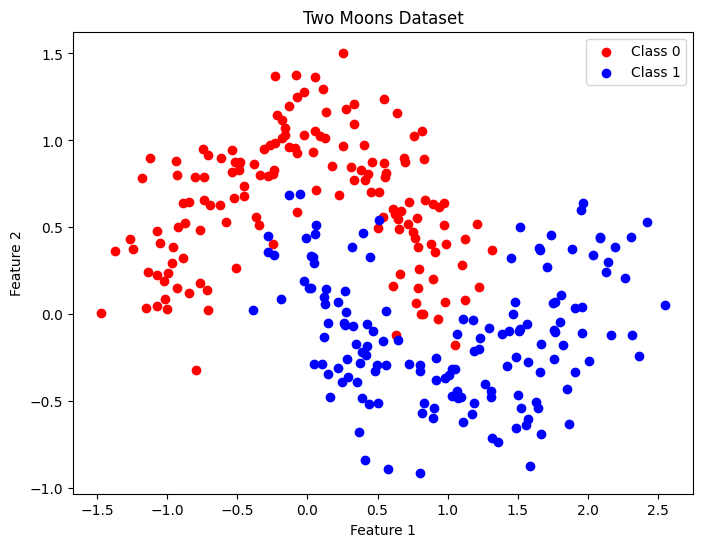

In [ ]:
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X_data[0, y_data[0]==0], X_data[1, y_data[0]==0], c='red', label='Class 0')
plt.scatter(X_data[0, y_data[0]==1], X_data[1, y_data[0]==1], c='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two Moons Dataset')
plt.legend()
plt.show()

In [ ]:
# Test our network on this data
predictions, _ = network.forward_propagation(X_data)
accuracy = np.mean((predictions > 0.5) == y_data)
print(f"Random network accuracy: {accuracy:.3f}")

Random network accuracy: 0.500
